In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
# csv 파일을 로딩
df = pd.read_csv("c:/data/ozone/ozone2.csv")
print(df.head())


      Ozone     Solar.R  Wind  Temp  Month  Day  Result
0  41.00000  190.000000   7.4    67      5    1       0
1  36.00000  118.000000   8.0    72      5    2       0
2  12.00000  149.000000  12.6    74      5    3       0
3  18.00000  313.000000  11.5    62      5    4       0
4  42.12931  185.931507  14.3    56      5    5       1


In [3]:
df.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day', 'Result'], dtype='object')

In [4]:
df.shape

(153, 7)

In [5]:
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day,Result
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922,0.529412
std,28.693372,87.960267,3.523001,9.465270,1.416522,8.864520,0.500773
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000,0.000000
25%,21.000000,120.000000,7.400000,72.000000,6.000000,8.000000,0.000000
50%,42.129310,194.000000,9.700000,79.000000,7.000000,16.000000,1.000000
75%,46.000000,256.000000,11.500000,85.000000,8.000000,23.000000,1.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000,1.000000


In [6]:
#오존량 분류를 기준으로 한 평균값들
df.groupby("Result").mean()

,Ozone,Solar.R,Wind,Temp,Month,Day
Result,,,,,,
0,20.902778,166.302702,11.270833,72.652778,6.972222,15.180556
1,60.997339,203.379334,8.790123,82.530864,7.012346,16.358025


Text(0, 0.5, '빈도')

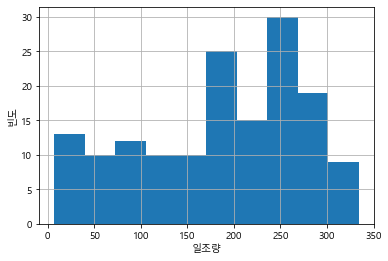

In [7]:
df["Solar.R"].hist()
plt.xlabel('일조량')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

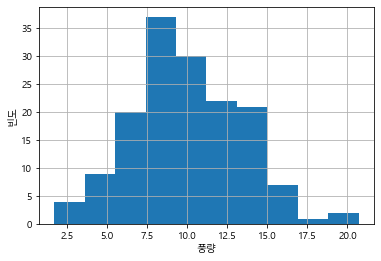

In [8]:
df["Wind"].hist()
plt.xlabel('풍량')
plt.ylabel('빈도') 

Text(0, 0.5, '빈도')

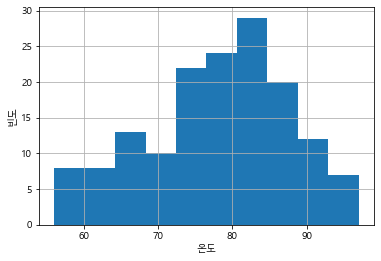

In [9]:
df["Temp"].hist()
plt.xlabel('온도')
plt.ylabel('빈도')

In [10]:
df["Result"].value_counts()

1    81
0    72
Name: Result, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' 분류\n (0:부족 || 1:정상 )')

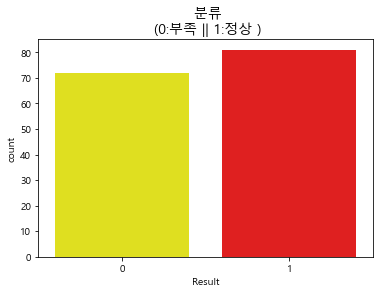

In [11]:
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot('Result', data=df, palette=colors)
plt.title(' 분류\n (0:부족 || 1:정상 )', fontsize=14) 
#불균형 데이터셋

In [12]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols)
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [13]:
df2["Result"].value_counts()

0    72
1    72
Name: Result, dtype: int64

In [14]:
#오버샘플링
from imblearn.over_sampling import SMOTE
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']
X_sample, y_sample=SMOTE(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [15]:
df2["Result"].value_counts()

0    81
1    81
Name: Result, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' 분류\n (0:부족 || 1:정상 )')

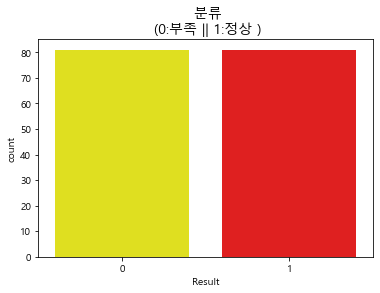

In [16]:
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot('Result', data=df2, palette=colors)
plt.title(' 분류\n (0:부족 || 1:정상 )', fontsize=14)

In [17]:
cols=['Solar.R', 'Wind', 'Temp']
X = X_samp[cols]
y = y_samp['Result']

In [18]:
import statsmodels.api as sm
#특정한 변수에서 값의 비율이 너무 낮은 경우 에러가 발생할 수 있음
#model=sm.Logit(y,X,method='bfgs')
model=sm.Logit(y,X)
result=model.fit()
#summary()에 표현되지 않는 값이 있을 경우 summary2() 사용
result.summary2()

Optimization terminated successfully.
         Current function value: 0.578389
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.166     
Dependent Variable: Result           AIC:              193.3980  
Date:               2022-05-26 17:10 BIC:              202.6608  
No. Observations:   162              Log-Likelihood:   -93.699   
Df Model:           2                LL-Null:          -112.29   
Df Residuals:       159              LLR p-value:      8.4354e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Solar.R    0.0035     0.0021    1.7215   0.0852   -0.0005    0.0076
Wind      -0.2730     0.0538   -5.0734   0.0000   -0.3785   -0.1676
Temp       0.0272     0.0079    3.4355   0.0006    0.0117    0.0427
=================================================================

"""

In [19]:
#pvalue가 0.05 보다 큰 값들을 제거
cols=['Wind', 'Temp']
X=X_samp[cols]
y=y_samp['Result']
df2=pd.concat([X,y],axis=1)

In [20]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.587764
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.152     
Dependent Variable: Result           AIC:              194.4356  
Date:               2022-05-26 17:10 BIC:              200.6108  
No. Observations:   162              Log-Likelihood:   -95.218   
Df Model:           1                LL-Null:          -112.29   
Df Residuals:       160              LLR p-value:      5.1178e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Wind      -0.2610     0.0523   -4.9950   0.0000   -0.3635   -0.1586
Temp       0.0342     0.0069    4.9515   0.0000    0.0206    0.0477
=================================================================

"""

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
print(" 학습용:",model.score(X_train, y_train))
print(" 검증용:",model.score(X_test, y_test)) 

 학습용: 0.8217054263565892
 검증용: 0.5757575757575758


In [23]:
#confusion matrix( 혼동행렬, 오분류표 ) 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm


array([[ 7,  7],
       [ 7, 12]], dtype=int64)

In [24]:
df_cm=pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
df_cm

,0,1
0,7,7
1,7,12


<AxesSubplot:title={'center':'Confusion Matrix'}>

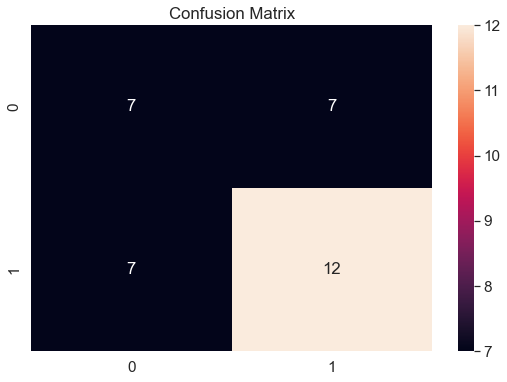

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자

In [26]:
import pandas as pd
df = pd.read_csv("c:/data/titanic/train3.csv")
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [27]:
df.columns

Index(['Survived', 'Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age',
       'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [28]:
cols=['Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[cols] # 독립변수
y = df["Survived"]

In [29]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Survived'])
df2=pd.concat([X_samp,y_samp],axis=1)


In [30]:
X = X_samp[cols] # 독립변수
y = y_samp["Survived"]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [32]:
from sklearn.linear_model import LogisticRegression
# C : 오차에 대한 패널티값, 너무 크면 과적합, 너무 작으면 과소적합
model = LogisticRegression(C=1000.0, random_state=0)

In [33]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [34]:
print(" 오분류 샘플개수: %d" % (y_test != pred).sum()) 

 오분류 샘플개수: 27


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(y_test, pred))
print("Precision : %.3f" % precision_score(y_test, pred))
print("Recall : %.3f" % recall_score(y_test, pred))
print("F1 : %.3f" % f1_score(y_test, pred))

Accuracy: 0.80
Precision : 0.806
Recall : 0.794
F1 : 0.800


In [36]:
from sklearn.metrics import confusion_matrix
y = [1, 0, 1, 1, 0, 1]
pred = [0, 0, 1, 1, 0, 1]
cm=confusion_matrix(y, pred)
print(cm)
# TN(True Negative) : 0을 0으로 맞춘 경우
# FP(False Positive) : 0인데 1로 틀린 경우
# FN(False Negative) : 1인데 0으로 틀린 경우
# TP(True Positive) : 1을 1로 맞춘 경우
tn,fp,fn,tp = confusion_matrix(y, pred).ravel()
print(tn,fp,fn,tp)

[[2 0]
 [1 3]]
2 0 1 3


In [37]:
# precision( 정확도, 정밀도 ) : 모델이 True라고 분류한 것 중에서 실제 True의 비율
# tp / (tp+fp)
y = [0, 1, 0, 0]
pred = [0, 1, 1, 0]
# 모델이 2개를 1로 분류하였으나 실제 1인 개수는 1이므로 정밀도는 0.5
0.5
precision_score(y, pred)

0.5

In [39]:
# recall( 재현율, 검출율 ) : 실제값이 True인 것 중에서 모델이 True라고 예측한 것의 비율
# tp / (tp+fn)
# precision은 모델의 입장에서 recall은 실제 정답의 입장에서 (바라보고자 하는 관점이 다름)
# 일반적으로 precision과 recall은 반비례 관계
import numpy as np
y = np.array([0, 1, 1, 0])
pred = np.array([0, 1, 0, 0])
# 실제값이 1인 개수 2, 모델이 1로 맞춘 개수 1
recall_score(y, pred)
# f1-score: precision과 recall의 조화평균(불균형 데이터셋에 많이 사용하는 평가 지표)
# 2*p*r/p+r
# support: 실제값의 개수(0이 1개, 1이 3개)
# accuracy: 전확도
# macro avg: 단순평균(모든 클래스를 동일한 비중으로 고려)
# weighted avg: 각 클래스에 속하는 표본의 개수로 가중평균(f1-score와 같은 값)

0.5